En este script, se compara los rendimientos generados por los distintos modelos entrenados anteriormente.

Primero, se importan las librerías necesarias

In [14]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Se definen los directorios que se van a emplear

In [ ]:
CWD = os.getcwd()
TEST_DATA_PATH = os.path.join(CWD, "dataset", "test")

# Ruta donde se guardaron los entrenamientos del paso anterior
PROJECT_PATH = os.path.join(CWD, "runs")

RESULTS_PATH = os.path.join(CWD, "test_results")

# Modelos a evaluar
variants = ['n', 's', 'm']

#df = pd.read_csv("full_dataset/ISIC_2019_Training_GroundTruth.csv")
#df = df.drop("UNK", axis=1)

#target_names = sorted([c for c in df.columns[1:]])
#target_names

## Rendimiento del entrenamiento

Durante el entrenamiento, Yolo genera automáticamente gráficas con el rendimiento de cada paso. Se procede a mostrar dichas gráfiacas para comparar el comportamiento de los modelos en el entrenamiento

Gráficas de entrenamiento de yolo11n-cls:


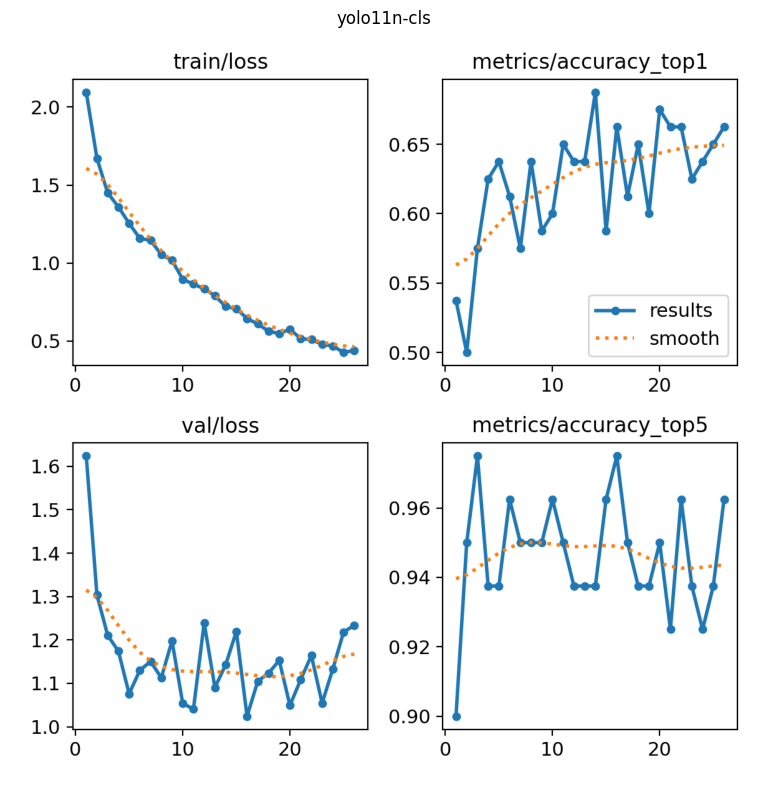

Gráficas de entrenamiento de yolo11s-cls:


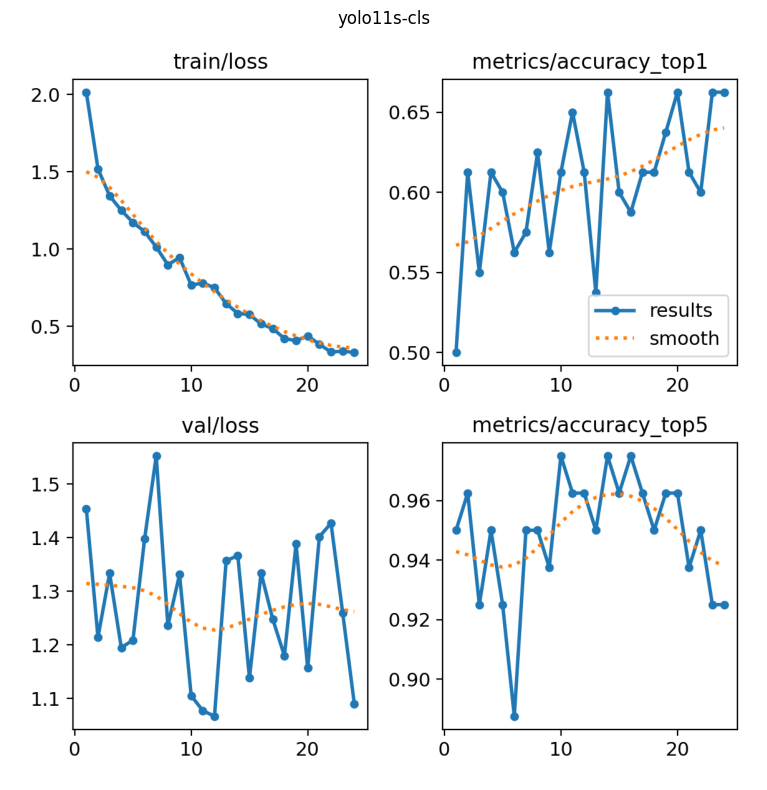

Gráficas de entrenamiento de yolo11m-cls:


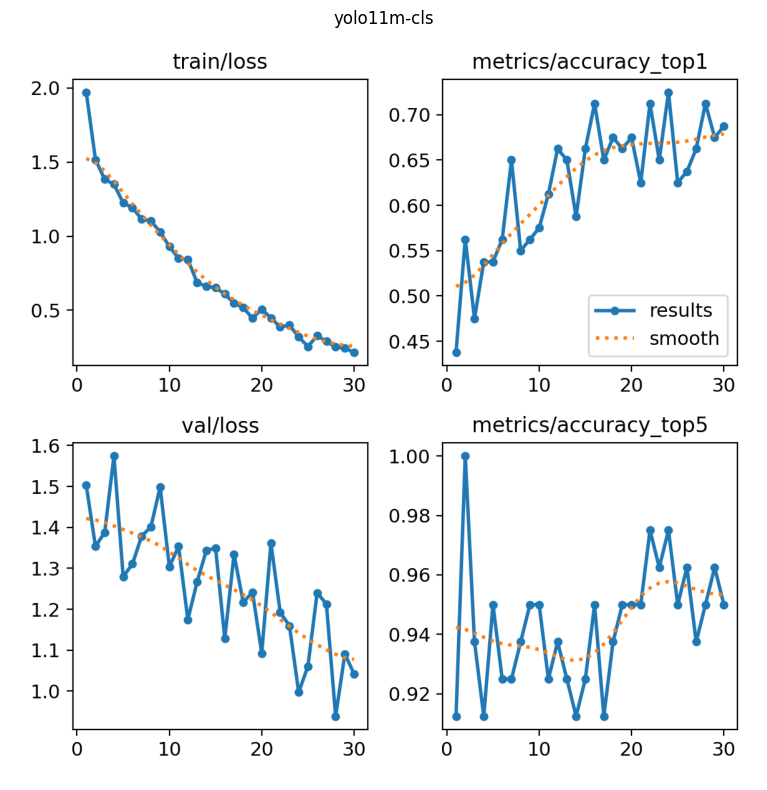

In [ ]:
models = ["yolo11n-cls.pt", "yolo11s-cls.pt", "yolo11m-cls.pt"]

for name in models:
    model_path = os.path.join(PROJECT_PATH, f"train_{name}")
    
    if not os.path.exists(model_path):
        print(f"No existe la carpeta: {model_path}")
        continue
        
    # Display results for the model
    print(f"Gráficas de entrenamiento de {name.replace(".pt", "")}:")
    results = os.path.join(model_path, "results.png")

    _, ax = plt.subplots(figsize=(10, 6))
    img = Image.open(results)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"{name.replace(".pt", "")}")
    plt.tight_layout()
    plt.show()

## Matrices de confusión y curvas ROC

Las matrices de confusión y las curvas ROC se generaron en el archivo *train.ipynb*, por lo que en este bloque nos limitaremos a enseñar las imágenes generadas.

Resultados para: yolo11n


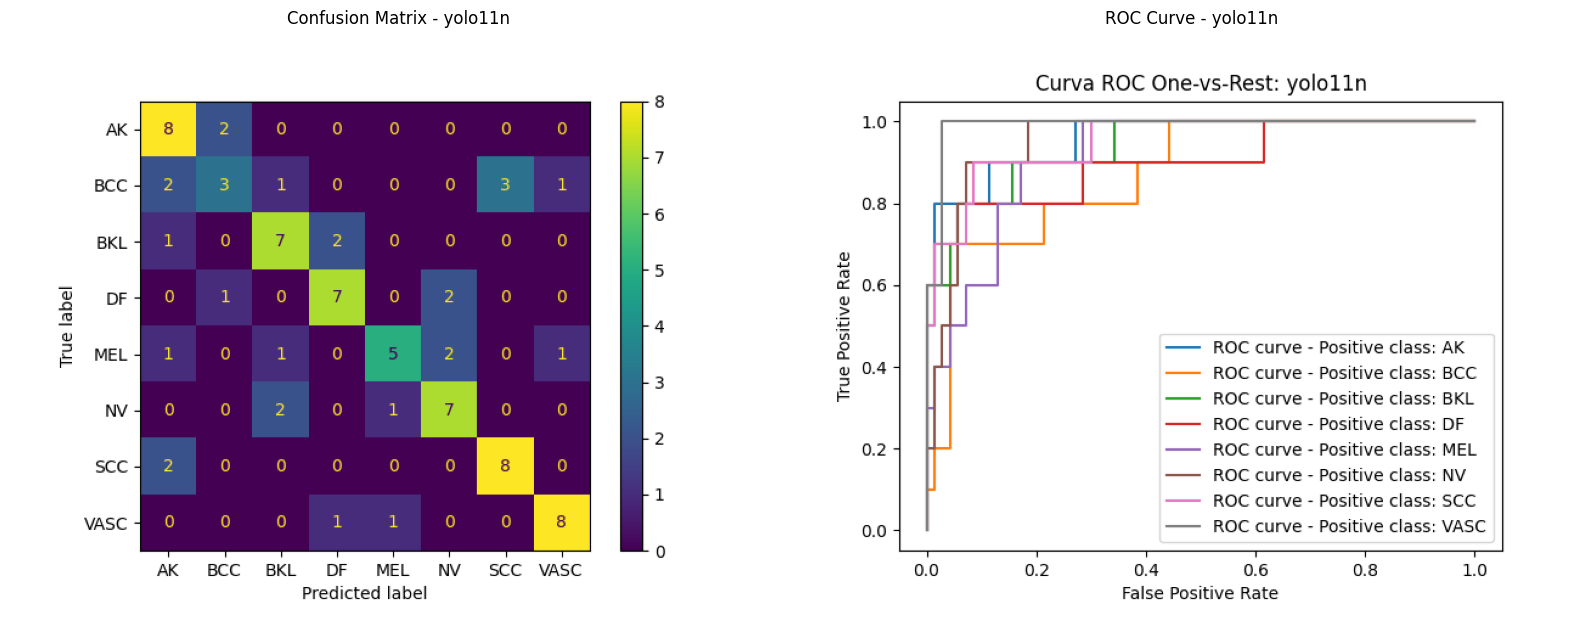

Resultados para: yolo11s


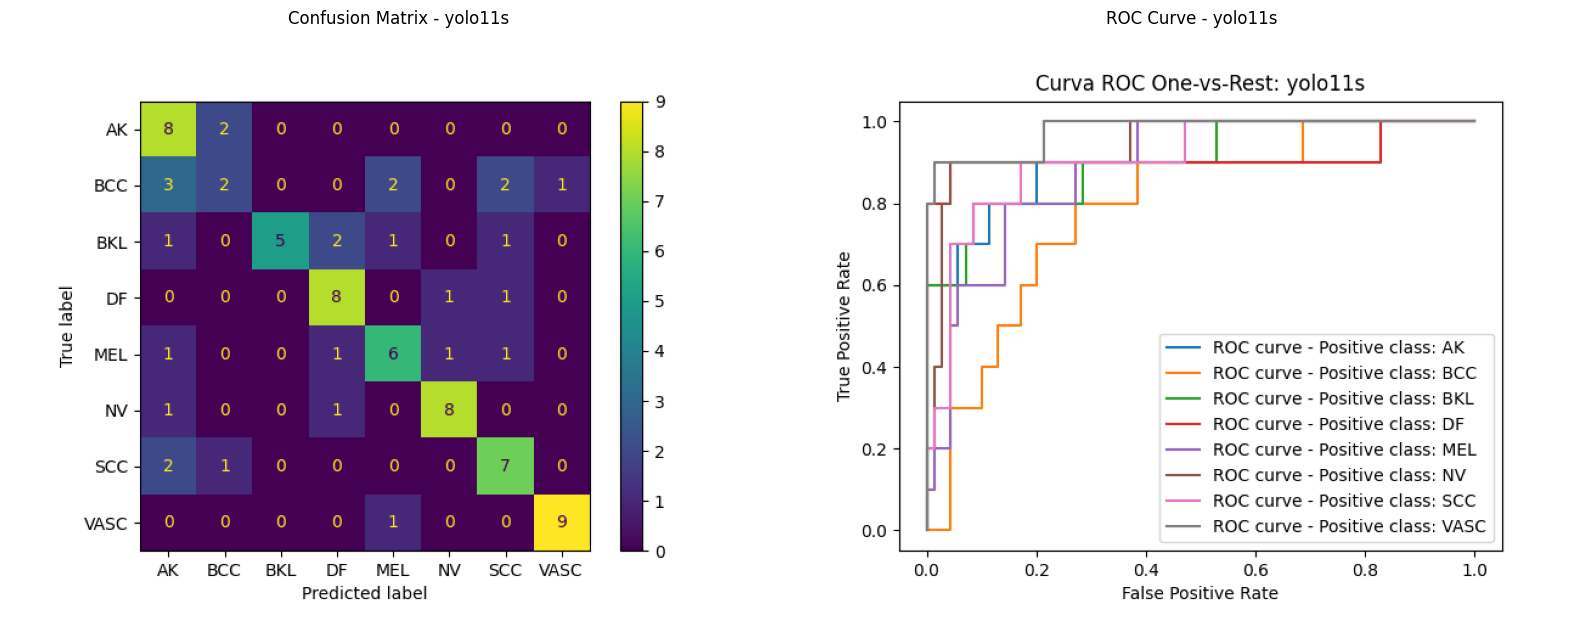

Resultados para: yolo11m


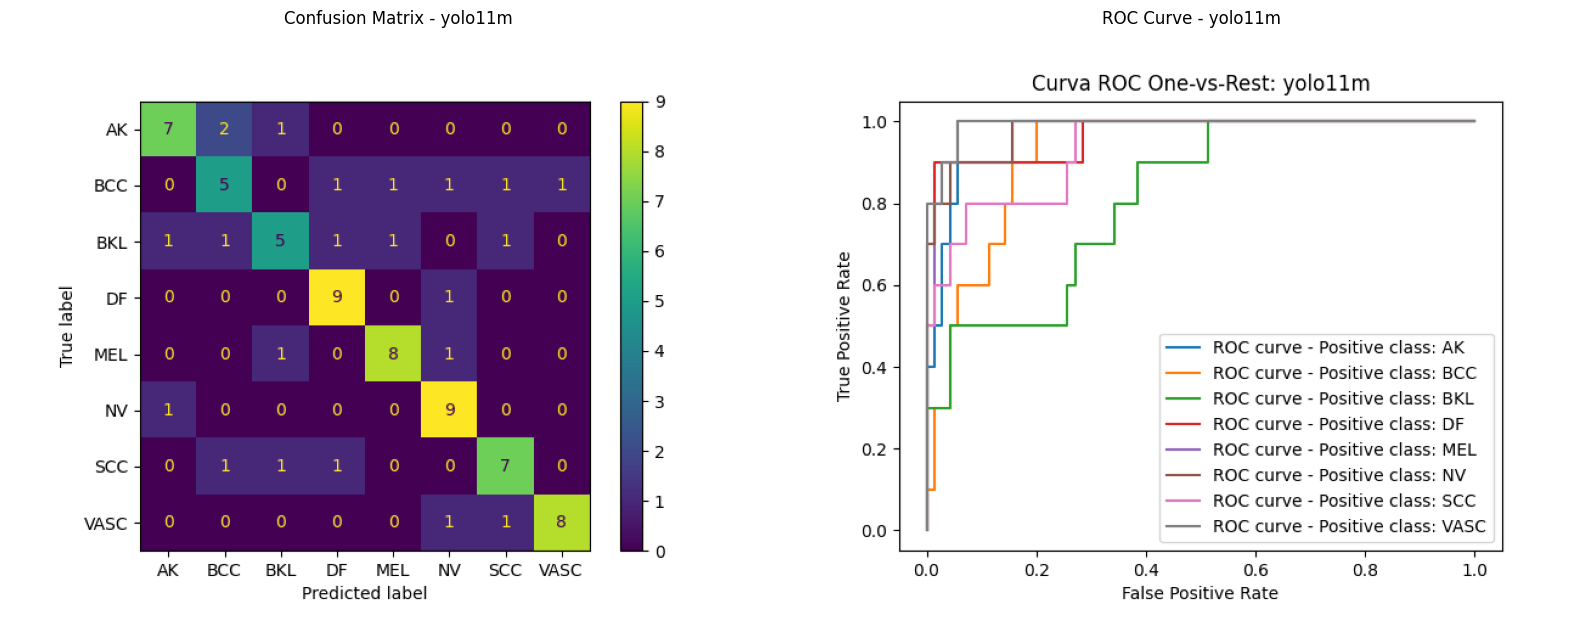

In [18]:
models = ["yolo11n", "yolo11s", "yolo11m"]

for name in models:
    cm_path = os.path.join(RESULTS_PATH, f"CM_{name}.png")
    roc_path = os.path.join(RESULTS_PATH, f"ROC_{name}.png")
    
    # Verificamos que existan las imágenes antes de intentar abrirlas
    if not os.path.exists(cm_path) or not os.path.exists(roc_path):
        print(f"Faltan imágenes para el modelo: {name}")
        continue
        
    print(f"Resultados para: {name}")
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    
    #Imagen 1: Matriz de Confusión
    img_cm = Image.open(cm_path)
    axes[0].imshow(img_cm)
    axes[0].axis('off')
    axes[0].set_title(f"Confusion Matrix - {name}")
    
    #Imagen 2: ROC
    img_roc = Image.open(roc_path)
    axes[1].imshow(img_roc)
    axes[1].axis('off')
    axes[1].set_title(f"ROC Curve - {name}")
    
    plt.tight_layout()
    plt.show()

## Rendimiento en la predicción

En el proceso de predicción también se generaron las métricas de rendimiento, como la matriz de confusión, accuracy, precisión etc. Se va a mostrar dichas métricas y a compararlas entre ellas

<Figure size 1200x600 with 0 Axes>

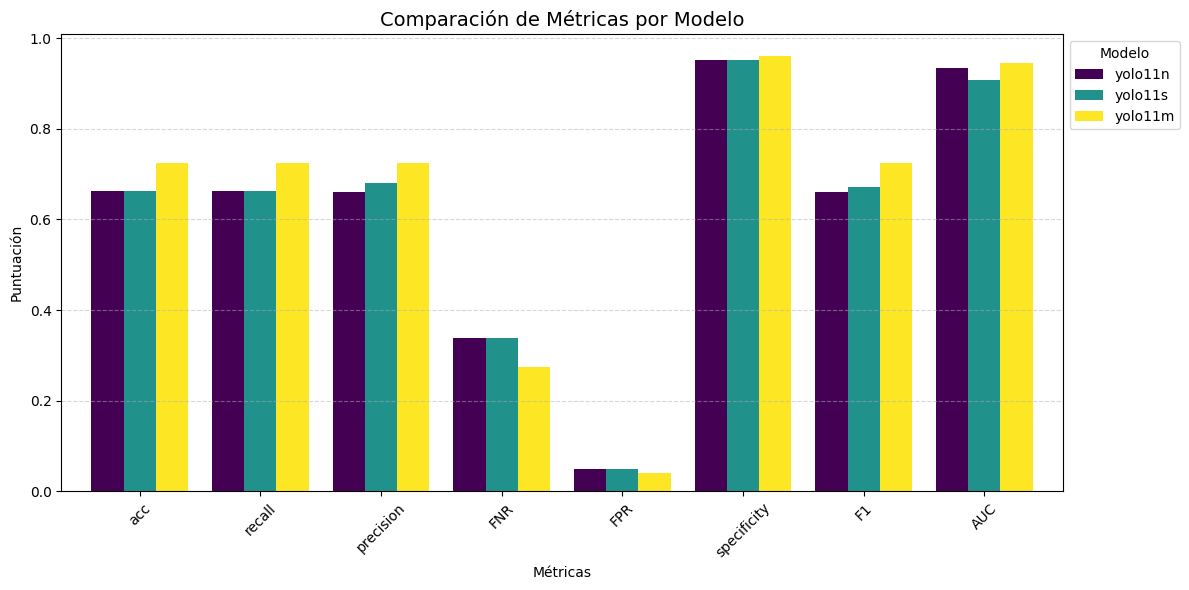

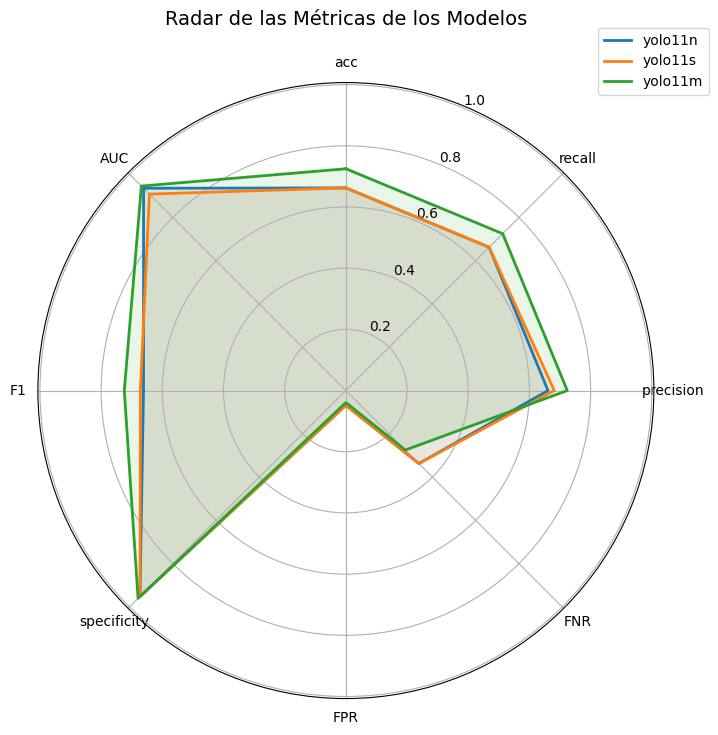

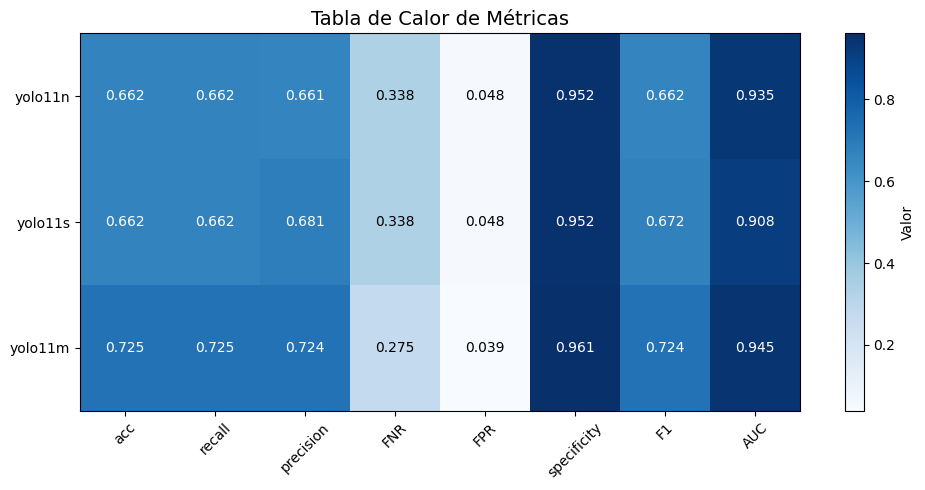

In [17]:
metrics = pd.read_csv(RESULTS_PATH + os.sep + "metrics.csv")

# Reescribimos la columna "Unnamed" para su uso
if 'Unnamed: 0' in metrics.columns:
    metrics.rename(columns={'Unnamed: 0': 'Model'}, inplace=True)
    metrics.set_index('Model', inplace=True)

# Gráfico de barras
plt.figure(figsize=(12, 6))
# Transponemos metrics directamente para el plot
metrics.T.plot(kind='bar', figsize=(12, 6), width=0.8, colormap='viridis')

plt.title('Comparación de Métricas por Modelo', fontsize=14)
plt.ylabel('Puntuación')
plt.xlabel('Métricas')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.0, 1.0), title='Modelo')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Gráfico de radar
labels = metrics.columns
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1] # Cerrar el círculo

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c'] 

for i, (model_name, row) in enumerate(metrics.iterrows()):
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=model_name, color=colors[i % len(colors)])
    ax.fill(angles, values, color=colors[i % len(colors)], alpha=0.1)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title('Radar de las Métricas de los Modelos', y=1.08, fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()

# Mapa de calor de las métricas
plt.figure(figsize=(10, 5))
plt.imshow(metrics.values, cmap='Blues', aspect='auto')

plt.xticks(range(len(metrics.columns)), metrics.columns, rotation=45)
plt.yticks(range(len(metrics.index)), metrics.index)

# Escribir los valores
for i in range(len(metrics.index)):
    for j in range(len(metrics.columns)):
        val = metrics.values[i, j]
        text_color = "white" if val > 0.6 else "black"
        plt.text(j, i, f"{val:.3f}", ha="center", va="center", color=text_color)

plt.colorbar(label='Valor')
plt.title('Tabla de Calor de Métricas', fontsize=14)
plt.tight_layout()
plt.show()